# Energy Efficiency of Buildings

The dataset for the remainder of this quiz is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

## Attribute Information:

1. Date, time year-month-day hour:minute:second

2. Appliances, energy use in Wh

3. lights, energy use of light fixtures in the house in Wh

4. T1, Temperature in kitchen area, in Celsius

5. RH_1, Humidity in kitchen area, in %

6. T2, Temperature in living room area, in Celsius

7. RH_2, Humidity in living room area, in %

8. T3, Temperature in laundry room area

9. RH_3, Humidity in laundry room area, in %

10. T4, Temperature in office room, in Celsius

11. RH_4, Humidity in office room, in %

12. T5, Temperature in bathroom, in Celsius

13. RH_5, Humidity in bathroom, in %

14. T6, Temperature outside the building (north side), in Celsius

15. RH_6, Humidity outside the building (north side), in %

16. T7, Temperature in ironing room , in Celsius

17. RH_7, Humidity in ironing room, in %

18. T8, Temperature in teenager room 2, in Celsius

19. RH_8, Humidity in teenager room 2, in %

20. T9, Temperature in parents room, in Celsius

21. RH_9, Humidity in parents room, in %

22. To, Temperature outside (from Chievres weather station), in Celsius

23. Pressure (from Chievres weather station), in mm Hg

24. RH_out, Humidity outside (from Chievres weather station), in %

25. Wind speed (from Chievres weather station), in m/s

26. Visibility (from Chievres weather station), in km

27. Tdewpoint (from Chievres weather station), Â °C

28. rv1, Random variable 1, nondimensional

29. rv2, Random variable 2, nondimensional

## Importing the dataset 

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use('dark_background')
#plt.rcParams['style'] = 'dark_background'
#plt.rcParams['figure.figsize']=[8, 5]

In [208]:
energy_data = pd.read_csv("energydata_complete.csv")
energy_data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [209]:
energy_data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## Renaming the columns

In [210]:
energy_data.columns = [ "Dates", "Appliances","Lights","Kitchen(T)","Kitchen(H)",
                      "Living_room(T)", "Living_room(H)","Laundry_room(T)", "Laundry_room(H)",
                      "Office_room(T)", "Office_room(H)", "Bathroom(T)","Bathroom(H)", 
                      "Outside(North Side)(T)","Outside(North Side)(H)","Ironing_room(T)",
                      "Ironing_room(H)","Teenager_room(T)","Teenager_room(H)","Parents_room(T)",
                      "Parents_room(H)","T_out","Press_mm_hg","H_out","Windspeed","Visibility",
                      "T_dewPoint","RV1", "RV2"]

In [211]:
energy_data.head()

,Dates,Appliances,Lights,Kitchen(T),Kitchen(H),Living_room(T),Living_room(H),Laundry_room(T),Laundry_room(H),Office_room(T),...,Parents_room(T),Parents_room(H),T_out,Press_mm_hg,H_out,Windspeed,Visibility,T_dewPoint,RV1,RV2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [212]:
energy_data.dtypes

Dates                      object
Appliances                  int64
Lights                      int64
Kitchen(T)                float64
Kitchen(H)                float64
Living_room(T)            float64
Living_room(H)            float64
Laundry_room(T)           float64
Laundry_room(H)           float64
Office_room(T)            float64
Office_room(H)            float64
Bathroom(T)               float64
Bathroom(H)               float64
Outside(North Side)(T)    float64
Outside(North Side)(H)    float64
Ironing_room(T)           float64
Ironing_room(H)           float64
Teenager_room(T)          float64
Teenager_room(H)          float64
Parents_room(T)           float64
Parents_room(H)           float64
T_out                     float64
Press_mm_hg               float64
H_out                     float64
Windspeed                 float64
Visibility                float64
T_dewPoint                float64
RV1                       float64
RV2                       float64
dtype: object

In [213]:
energy_data.isnull().sum()

Dates                     0
Appliances                0
Lights                    0
Kitchen(T)                0
Kitchen(H)                0
Living_room(T)            0
Living_room(H)            0
Laundry_room(T)           0
Laundry_room(H)           0
Office_room(T)            0
Office_room(H)            0
Bathroom(T)               0
Bathroom(H)               0
Outside(North Side)(T)    0
Outside(North Side)(H)    0
Ironing_room(T)           0
Ironing_room(H)           0
Teenager_room(T)          0
Teenager_room(H)          0
Parents_room(T)           0
Parents_room(H)           0
T_out                     0
Press_mm_hg               0
H_out                     0
Windspeed                 0
Visibility                0
T_dewPoint                0
RV1                       0
RV2                       0
dtype: int64

### There are no missing values.

In [214]:
energy_data1 = energy_data.drop(['Dates', 'Lights'], axis =1)

In [215]:
energy_data1.head()

,Appliances,Kitchen(T),Kitchen(H),Living_room(T),Living_room(H),Laundry_room(T),Laundry_room(H),Office_room(T),Office_room(H),Bathroom(T),...,Parents_room(T),Parents_room(H),T_out,Press_mm_hg,H_out,Windspeed,Visibility,T_dewPoint,RV1,RV2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [216]:
energy_data1.describe()

,Appliances,Kitchen(T),Kitchen(H),Living_room(T),Living_room(H),Laundry_room(T),Laundry_room(H),Office_room(T),Office_room(H),Bathroom(T),...,Parents_room(T),Parents_room(H),T_out,Press_mm_hg,H_out,Windspeed,Visibility,T_dewPoint,RV1,RV2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [294]:
features = energy_data1[["Kitchen(T)","Kitchen(H)",
            "Living_room(T)", "Living_room(H)","Laundry_room(T)", "Laundry_room(H)",
            "Office_room(T)", "Office_room(H)", "Bathroom(T)","Bathroom(H)", 
            "Outside(North Side)(T)","Outside(North Side)(H)","Ironing_room(T)",
            "Ironing_room(H)","Teenager_room(T)","Teenager_room(H)","Parents_room(T)",
            "Parents_room(H)","T_out","Press_mm_hg","H_out","Windspeed","Visibility",
            "T_dewPoint","RV1", "RV2"]]

In [364]:
target = energy_data1['Appliances']

## EDA

In [296]:
def scatter(data,x, y):
    plt.style.use("dark_background")
    sns.scatterplot(data=data,x=x, y=y)
    plt.show()
    
def distribution(data, x):
    plt.style.use("dark_background")
    sns.distplot(data[x])
    plt.show()


def box(data, feature):
    sns.set_style('whitegrid')
    sns.boxplot(data=data, x=feature,orient='v')
    plt.show()


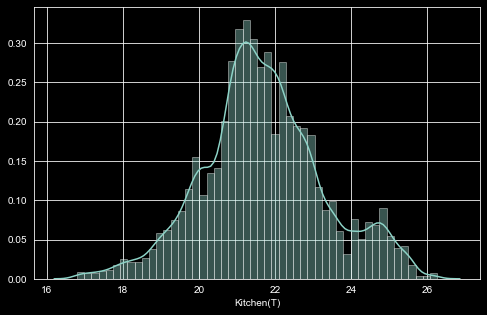

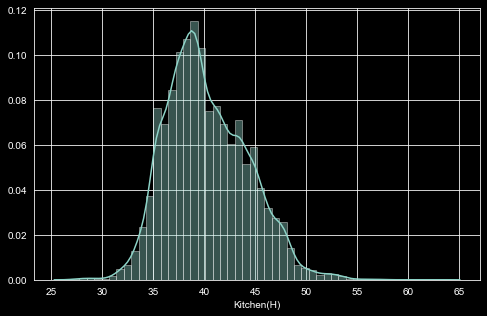

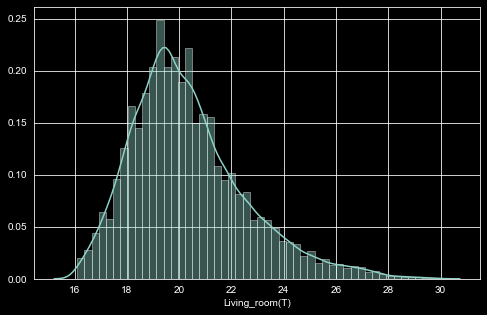

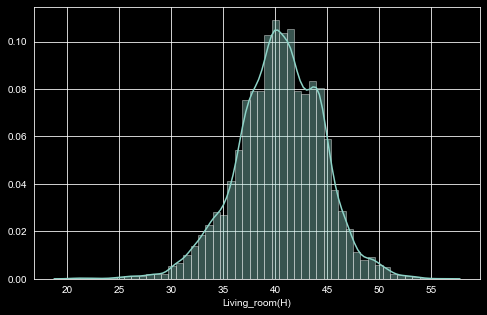

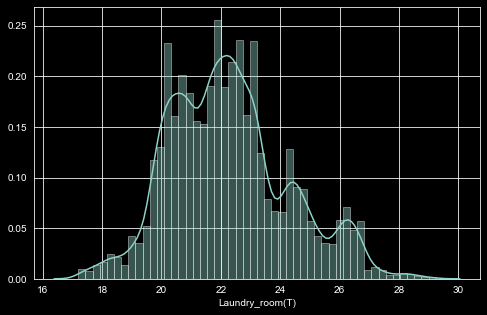

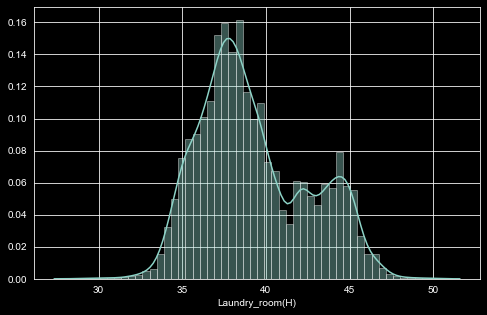

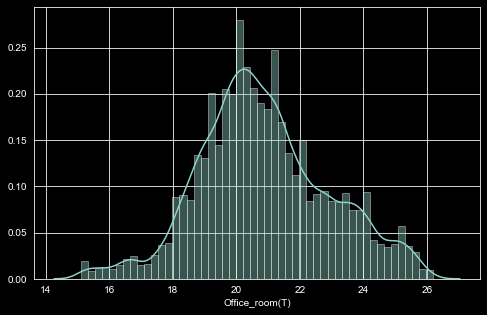

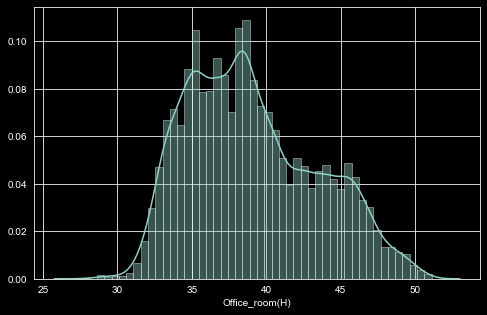

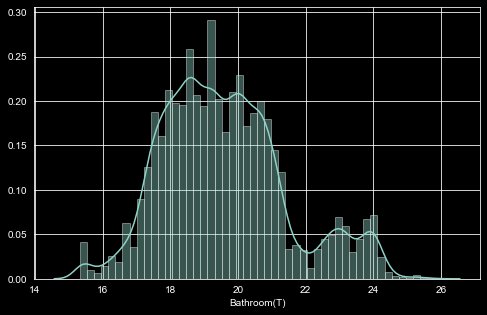

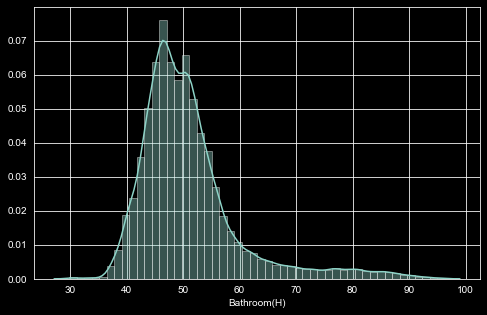

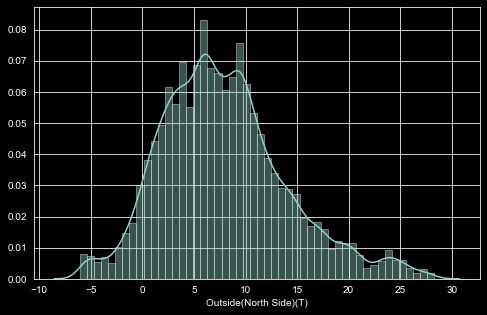

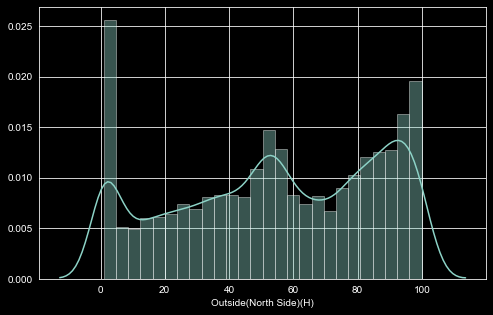

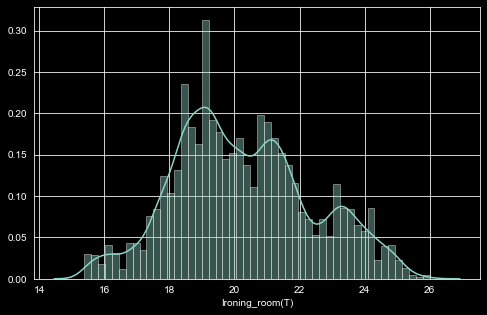

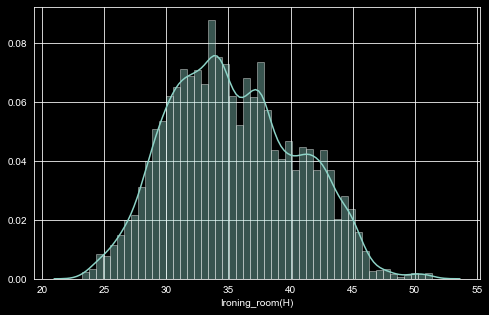

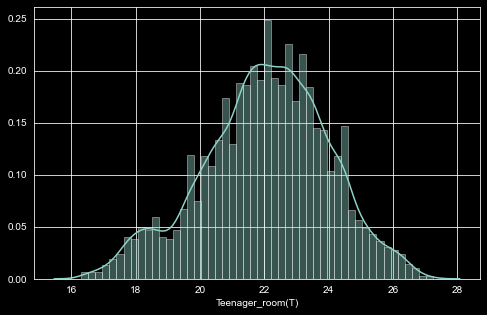

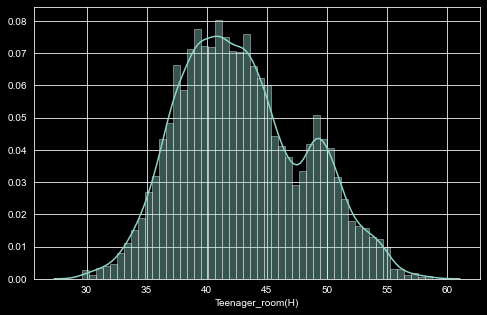

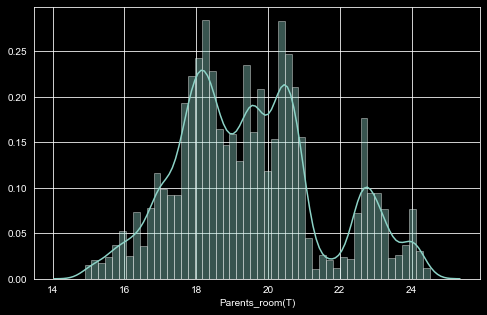

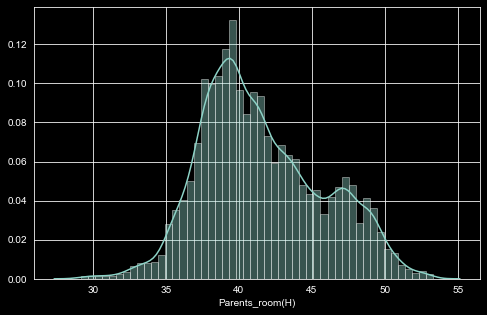

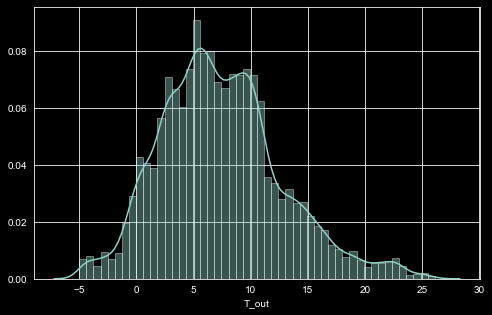

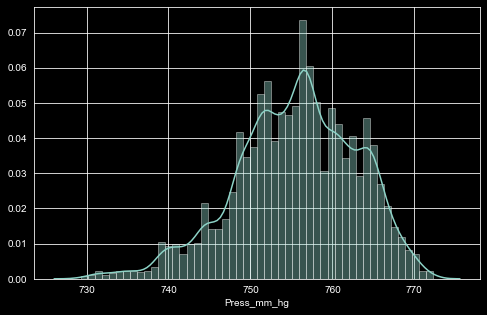

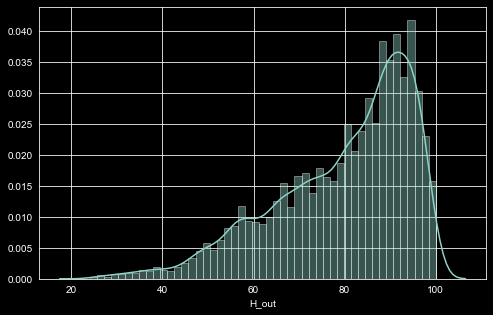

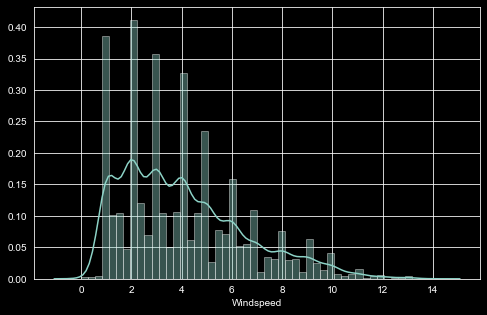

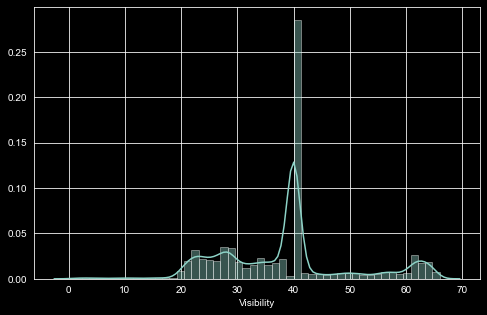

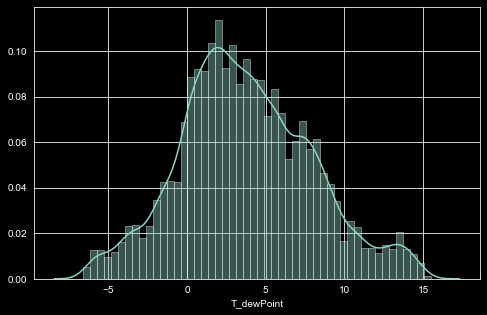

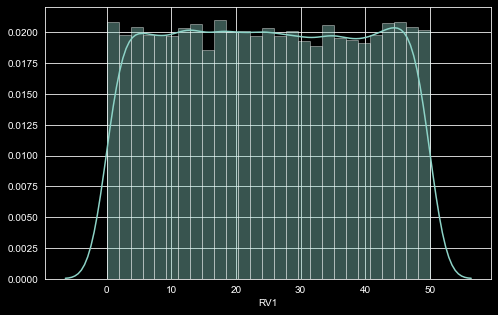

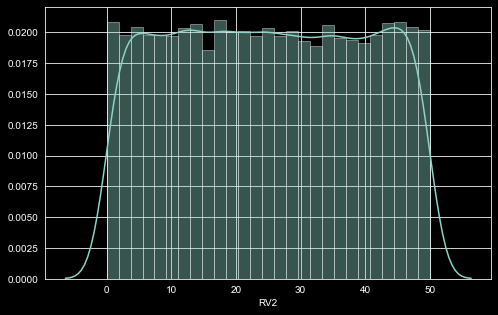

In [221]:
for feature in features.columns:
    distribution(features, feature)

## Most of the features are Normally distributed and there are some features which are left skewed

# Checking Outliers

In [222]:
# lets find some outliers in the features.
# lets make boxplot
# features.columns[:-2]  ---> not taking the last two columns.
def check_outliers(features, feature):
    for i in range(len(features[feature])):
        if features[feature][i]> upper_limit or features[feature][i]<lower_limit:
            print(f"These {feature} has outliers in it")
            box(features, feature)
            return feature
    
def remove_outliers(feature=None):
    if feature is not None:
        features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Kitchen(T) has outliers in it


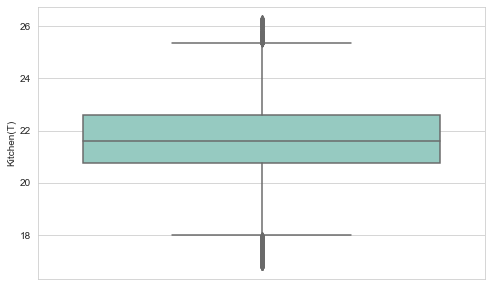

These Kitchen(H) has outliers in it


<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


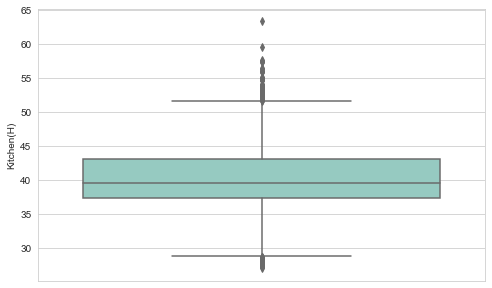

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Living_room(T) has outliers in it


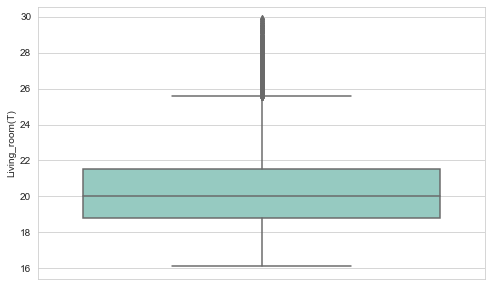

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Living_room(H) has outliers in it


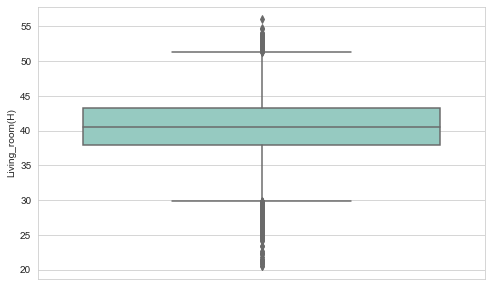

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Laundry_room(T) has outliers in it


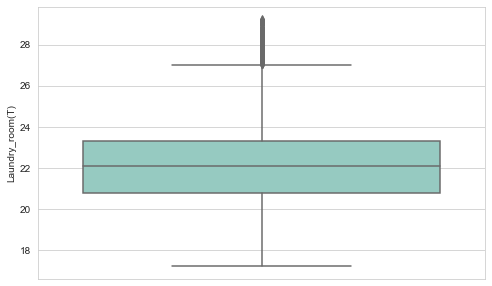

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Laundry_room(H) has outliers in it


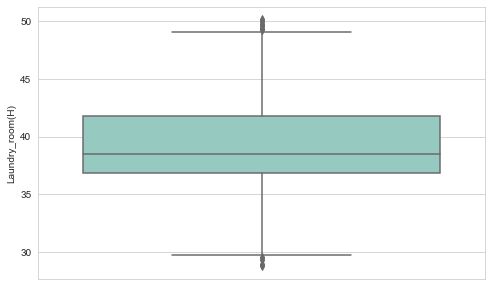

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Office_room(T) has outliers in it


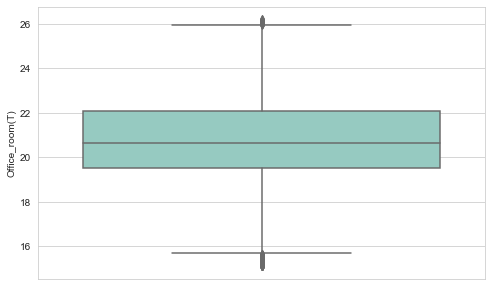

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Bathroom(T) has outliers in it


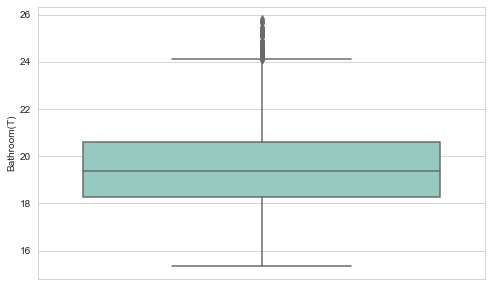

These Bathroom(H) has outliers in it


<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


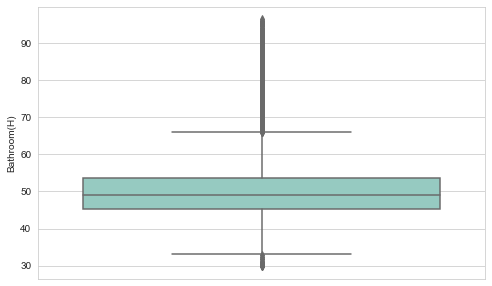

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Outside(North Side)(T) has outliers in it


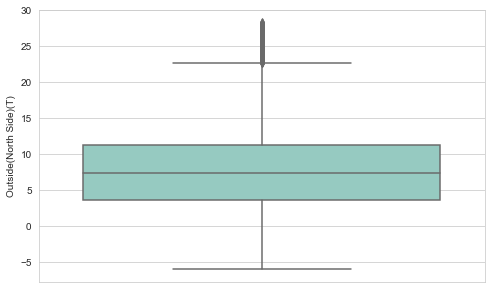

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Ironing_room(T) has outliers in it


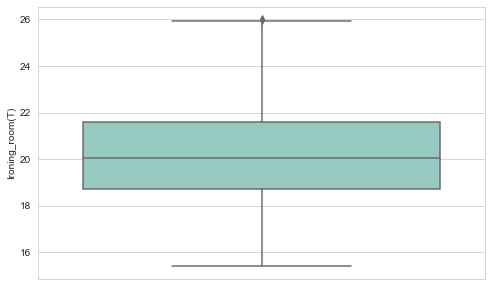

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Ironing_room(H) has outliers in it


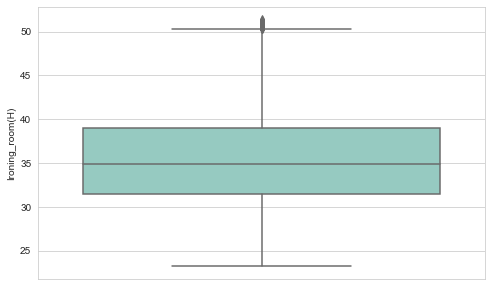

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Teenager_room(T) has outliers in it


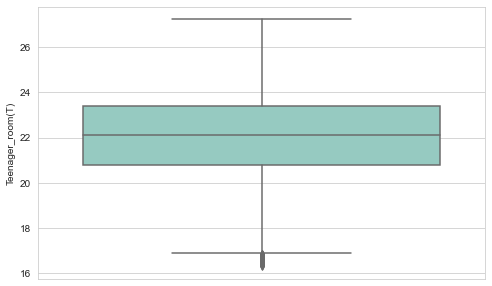

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Teenager_room(H) has outliers in it


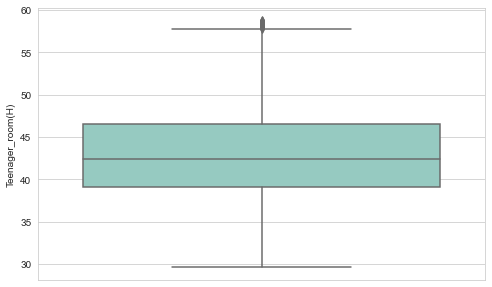

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Parents_room(H) has outliers in it


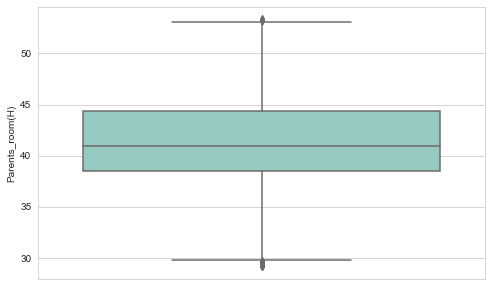

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These T_out has outliers in it


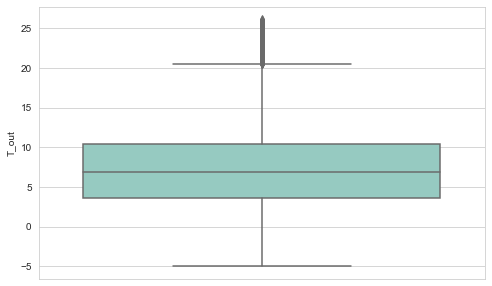

These Press_mm_hg has outliers in it


<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


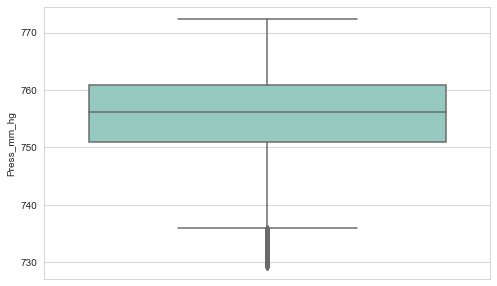

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These H_out has outliers in it


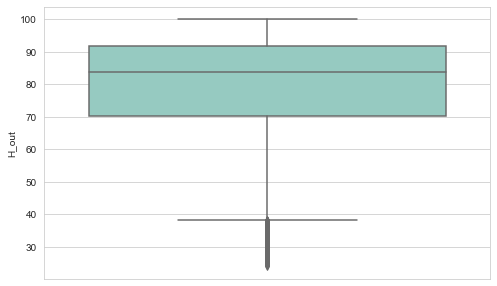

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Windspeed has outliers in it


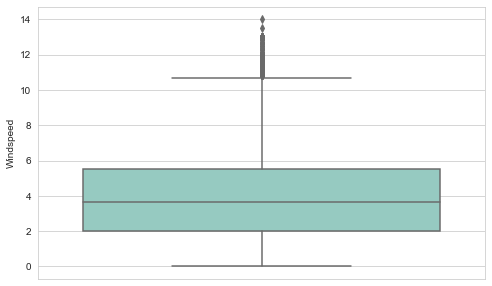

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These Visibility has outliers in it


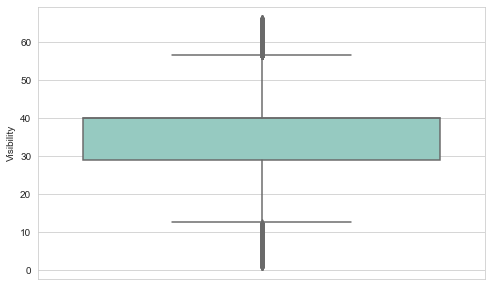

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


These T_dewPoint has outliers in it


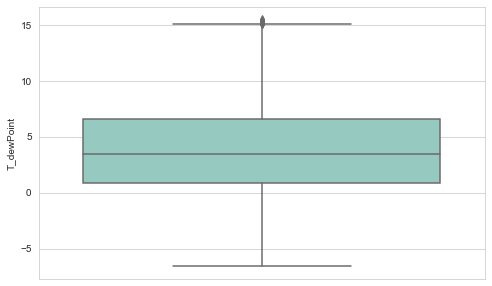

<ipython-input-222-8f161805bddf>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[feature] = np.where(features[feature]>upper_limit,upper_limit,np.where(features[feature]<lower_limit,lower_limit,features[feature]))


In [223]:
for feature in features.columns:
    percentile25 = features[feature].quantile(0.25)
    percentile75 = features[feature].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 *iqr
    lower_limit = percentile25 - 1.5 *iqr
    outlier_feature = check_outliers(features, feature)
    remove_outliers(outlier_feature)
    

#### These are the no of features which has outliers

In [225]:
print(f"There are total {len(outlier_features)} features out off 27 which has outliers.")

outlier_features

There are total 21 features out off 27 which has outliers.


['Kitchen(T)',
 'Kitchen(H)',
 'Living_room(T)',
 'Living_room(H)',
 'Laundry_room(T)',
 'Laundry_room(H)',
 'Office_room(T)',
 'Bathroom(T)',
 'Bathroom(H)',
 'Outside(North Side)(T)',
 'Ironing_room(T)',
 'Ironing_room(H)',
 'Teenager_room(T)',
 'Teenager_room(H)',
 'Parents_room(H)',
 'T_out',
 'Press_mm_hg',
 'H_out',
 'Windspeed',
 'Visibility',
 'T_dewPoint']

# Let see how model performs on Data which has outliers in it.

## Linear Regression

In [300]:
# Performing MinMaxScaling
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaled_feature1 = pd.DataFrame(scaler1.fit_transform(features),columns = features.columns)
target = scaler1.fit_transform(np.array(target).reshape(-1,1))


#train_test_split
from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(scaled_feature1, target, test_size =0.3, random_state =42)


# Model Performance with outliers.
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x3_train, y3_train)

LinearRegression()

## Model Evaluation for Linear Regression

In [303]:
y_linear = linear.predict(x3_test)
print("Weights of features when Perform  Linear Regression:\n", linear.coef_)

#metrics
metrics(y3_test, y_linear)

Weights of features when Perform  Linear Regression:
 [[-0.00328105  0.5535466  -0.23617792 -0.45669795  0.29062714  0.09604827
   0.028981    0.02638578 -0.01565684  0.01600579  0.23642491  0.03804865
   0.01031878 -0.04461364  0.10199505 -0.15759548 -0.18994077 -0.03980032
  -0.32185967  0.00683933 -0.07767065  0.02918313  0.01230661  0.11775773
   0.0007701   0.0007701 ]]
R^2 Squared: 0.14890246319303535
MSE: 0.007658778867195367
MAE: 0.05013362397742954


## Ridge and Lasso Regression

In [307]:
# Performing Ridge and  Lasso without removing outliers
from sklearn.linear_model import Ridge, Lasso
ridge2 = Ridge(alpha =0.001)
ridge2.fit(x3_train, y3_train)

y_ridge2 = ridge2.predict(x3_test)
print("Weights for Ridge Regression:\n", ridge2.coef_)

#metrics for Ridge Regresssion
print("\nMetrics for Ridge Regression without removing Outliers.\n")
metrics(y3_test, y_ridge2)


# Lasso regression
lasso1 = Lasso(alpha = 0.001)
lasso1.fit(x3_train, y3_train)
y_lasso1 = lasso1.predict(x3_test)
print("Weights for Lasso Regression:\n", lasso1.coef_)

# metrics fro Lasso regression
print("\nMetrics for Lasso Regression without removing Outliers.\n")
metrics(y3_test, y_lasso1)


Weights for Ridge Regression:
 [[-0.00332489  0.55345338 -0.23607996 -0.45657018  0.29062121  0.09604525
   0.02897684  0.02638096 -0.01566912  0.01600631  0.23636896  0.03804089
   0.01031838 -0.04461725  0.10199296 -0.15759407 -0.18993886 -0.03980479
  -0.32167375  0.00683874 -0.07759688  0.02918662  0.0123059   0.11764806
   0.00077004  0.00077004]]

Metrics for Ridge Regression without removing Outliers.

R^2 Squared: 0.148902086464059
MSE: 0.007658782257269711
MAE: 0.050133452242770465
Weights for Lasso Regression:
 [ 0.          0.01787993  0.         -0.          0.          0.
 -0.          0.         -0.          0.          0.         -0.
 -0.         -0.          0.         -0.00011004 -0.         -0.
  0.         -0.         -0.04955749  0.00291176  0.          0.
 -0.         -0.        ]

Metrics for Lasso Regression without removing Outliers.

R^2 Squared: 0.026800880567125818
MSE: 0.008757535449401907
MAE: 0.055256639821262235


### Result we obtained from the model when using dataset with outliers.

# Outliers are Removed Using IQR Technique.

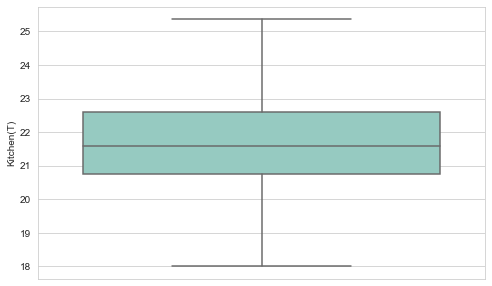

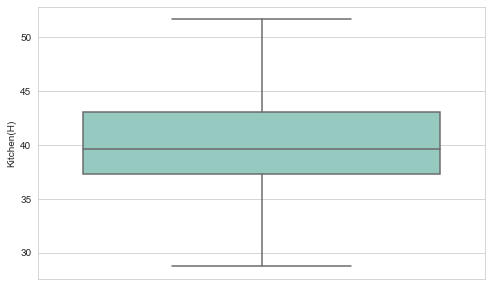

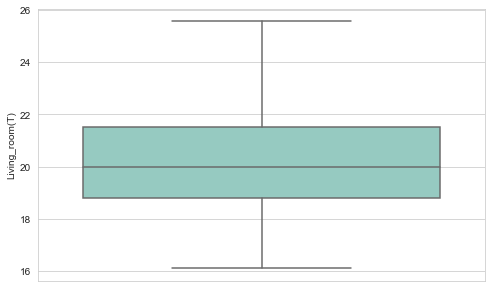

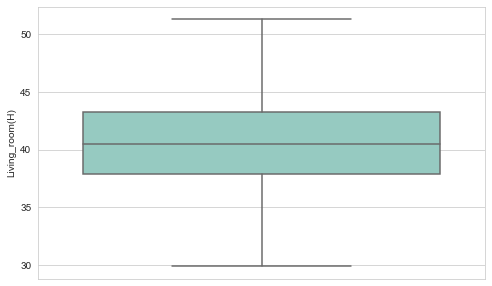

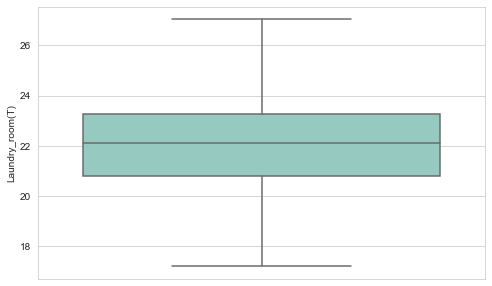

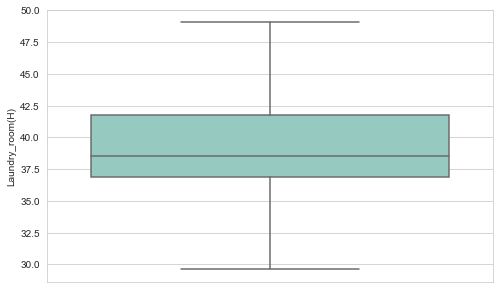

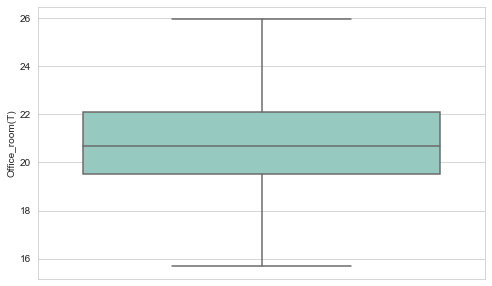

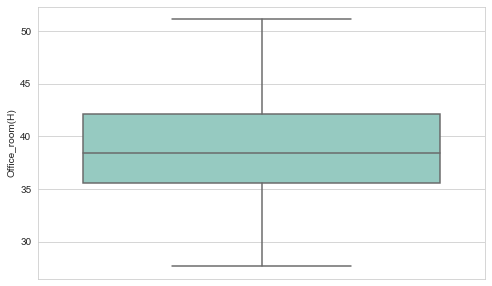

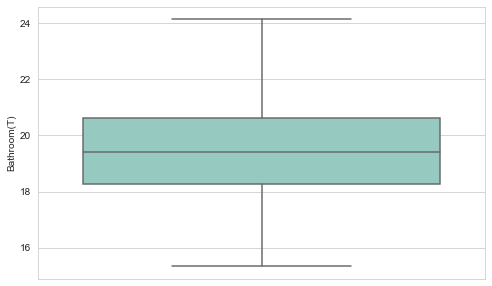

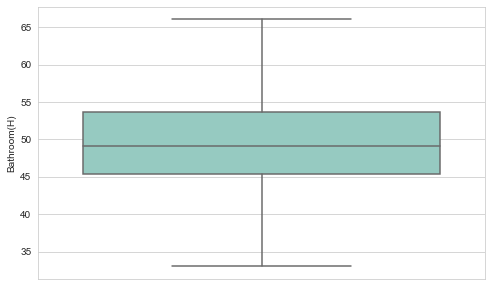

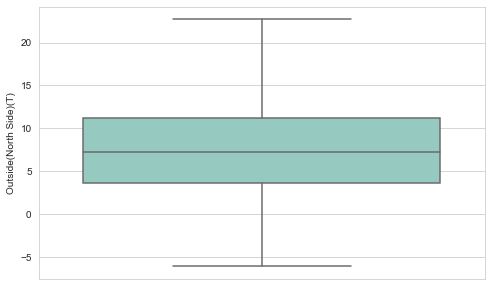

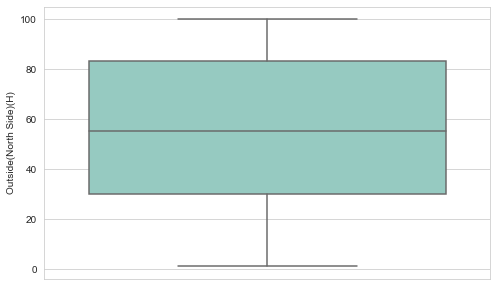

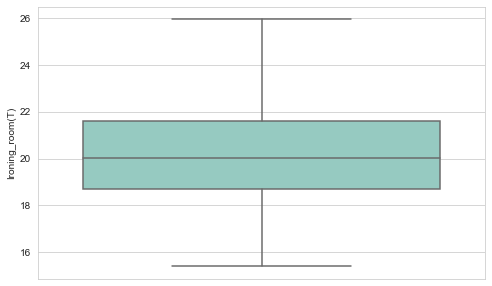

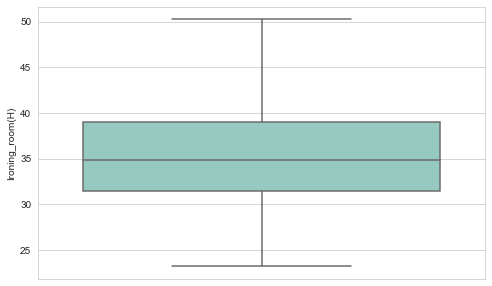

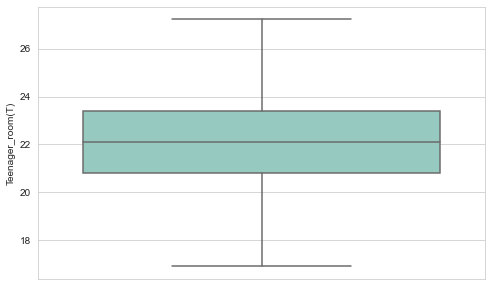

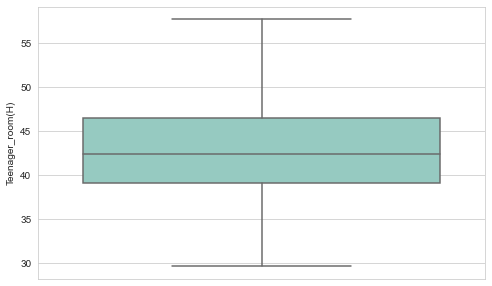

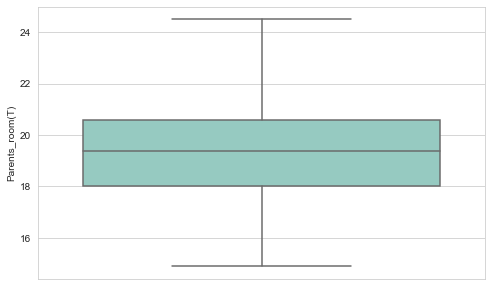

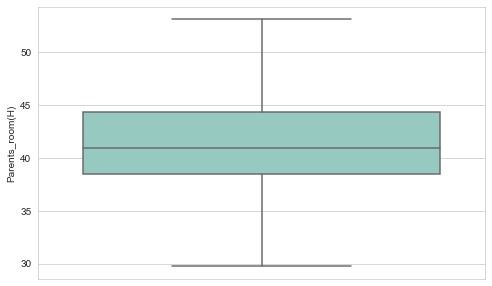

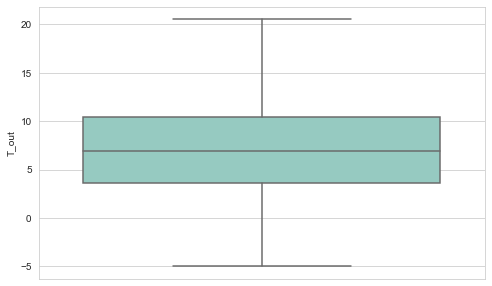

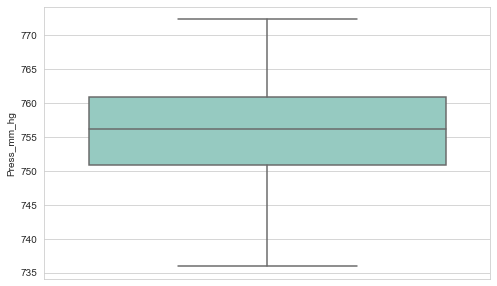

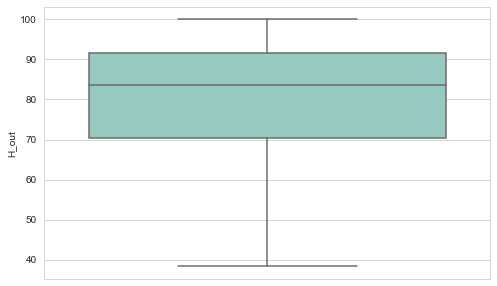

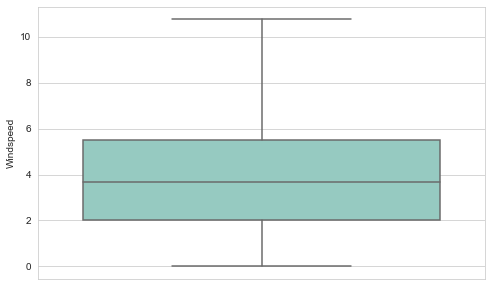

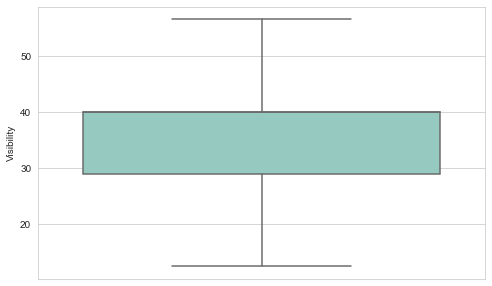

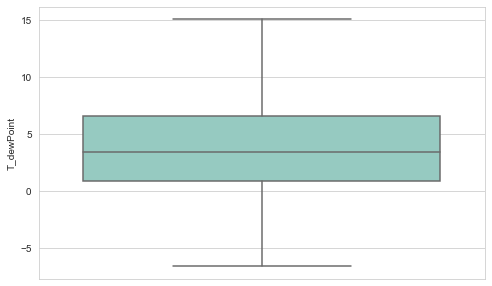

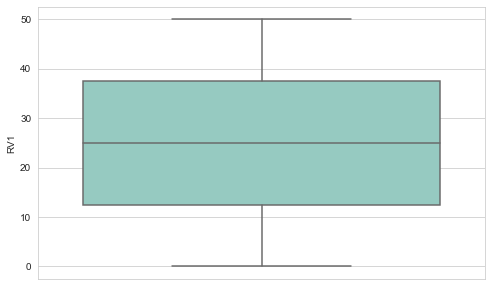

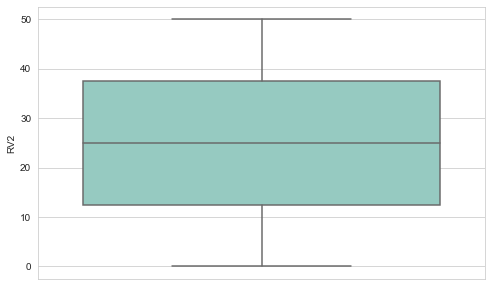

In [226]:
for feature in features.columns:
    box(features, feature)

In [227]:
# Hence we removed each an every outlier from the features who were having outliers in it.

# Perform the model on the dataset which doesn't have any outliers.

# Normalise the dataset using MinMaxScalar

In [228]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_feature = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)

In [229]:
target1 = scaler.fit_transform(np.array(target).reshape(-1,1))

In [230]:
scaled_feature.head()

,Kitchen(T),Kitchen(H),Living_room(T),Living_room(H),Laundry_room(T),Laundry_room(H),Office_room(T),Office_room(H),Bathroom(T),Bathroom(H),...,Parents_room(T),Parents_room(H),T_out,Press_mm_hg,H_out,Windspeed,Visibility,T_dewPoint,RV1,RV2
0,0.256793,0.822529,0.327522,0.696362,0.263211,0.777778,0.323444,0.764262,0.208644,0.671491,...,0.223032,0.676040,0.454531,0.0,0.87027,0.651163,1.000000,0.549231,0.265449,0.265449
1,0.256793,0.783140,0.327522,0.693214,0.263211,0.780864,0.323444,0.782437,0.208644,0.671491,...,0.226500,0.677325,0.449959,0.0,0.87027,0.620155,1.000000,0.544615,0.372083,0.372083
2,0.256793,0.765988,0.327522,0.688744,0.263211,0.788237,0.316310,0.778062,0.208644,0.668163,...,0.219563,0.674755,0.445388,0.0,0.87027,0.589147,0.973485,0.540000,0.572848,0.572848
3,0.256793,0.755814,0.327522,0.687034,0.263211,0.791667,0.312743,0.770949,0.208644,0.668163,...,0.219563,0.670473,0.440816,0.0,0.87027,0.558140,0.886364,0.535385,0.908261,0.908261
4,0.256793,0.767442,0.327522,0.684235,0.263211,0.791667,0.312743,0.762697,0.212431,0.668163,...,0.219563,0.670473,0.436245,0.0,0.87027,0.527132,0.799242,0.530769,0.201611,0.201611


In [231]:
target1

array([[0.04672897],
       [0.04672897],
       [0.03738318],
       ...,
       [0.24299065],
       [0.38317757],
       [0.39252336]])

# Splitting the dataset into train and test split

In [232]:
## Train_test_split with scaled values
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_feature, target1, test_size = 0.3, random_state=42)


# for not scaled values
x1_train, x1_test, y1_train, y1_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Linear Regression

In [233]:
# Applying Linear Model Regression for scaled dataset

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


# applying linear Regression for not scaled Dataset
model1 = LinearRegression()
model1.fit(x1_train, y1_train)
y_pred1 = model1.predict(x1_test)

In [234]:
# weights at every features for the scaled Dataset 
model.coef_

array([[-0.01716421,  0.33317812, -0.13086148, -0.23520216,  0.2312847 ,
         0.07726746,  0.0243956 ,  0.01766312, -0.01039118,  0.00170987,
         0.19855527,  0.03854764,  0.01407546, -0.04470536,  0.10305199,
        -0.14258852, -0.2035339 , -0.04255829, -0.19434856,  0.00788921,
        -0.02980079,  0.02553909,  0.00743828,  0.04593083,  0.0007531 ,
         0.0007531 ]])

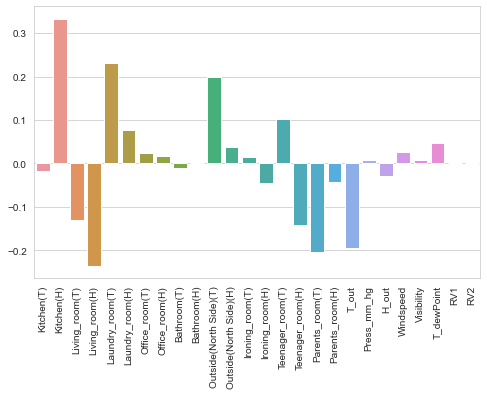

In [235]:
sns.barplot(list(scaled_feature.columns), model.coef_.flatten(),orient = 'v')
plt.xticks(rotation =90)
plt.show ()

# Features with highest weight is Kitchen(H) i.e Humidity in Kitchen in %.

In [237]:
#Model Evaluation.
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

def metrics(y_test, y_pred):
    print("R^2 Squared:", r2_score(y_test, y_pred))
    print("MSE:",mean_squared_error(y_test,y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))

In [238]:
metrics(y_test,y_pred) #---> for scaled Dataset

R^2 Squared: 0.1480121851100623
MSE: 0.007666790220386897
MAE: 0.05024942580109376


In [239]:
metrics(y1_test, y_pred1) # ---> for not scaled dataset

R^2 Squared: 0.1480121851100623
MSE: 8777.708123320956
MAE: 53.76688560717038


### MSE Value is more when we didnt scaled the dataset compared to the MSE value when we scaled the dataset.

# Ridge regression

In [271]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.0001)  #---> lets take alpha =0.0001
ridge.fit(x_train, y_train)
y_ridge = ridge.predict(x_test)

In [272]:
metrics(y_test, y_ridge)

R^2 Squared: 0.14801216410808493
MSE: 0.007666790409377575
MAE: 0.05024941665996214


In [273]:
ridge.coef_

array([[-0.01716494,  0.33317671, -0.13085966, -0.23520035,  0.23128423,
         0.07726735,  0.02439533,  0.01766311, -0.01039171,  0.00170989,
         0.19855274,  0.03854734,  0.01407505, -0.04470532,  0.10305165,
        -0.14258848, -0.20353272, -0.04255844, -0.19434184,  0.00788916,
        -0.02979846,  0.02553911,  0.00743826,  0.04592661,  0.00075309,
         0.00075309]])

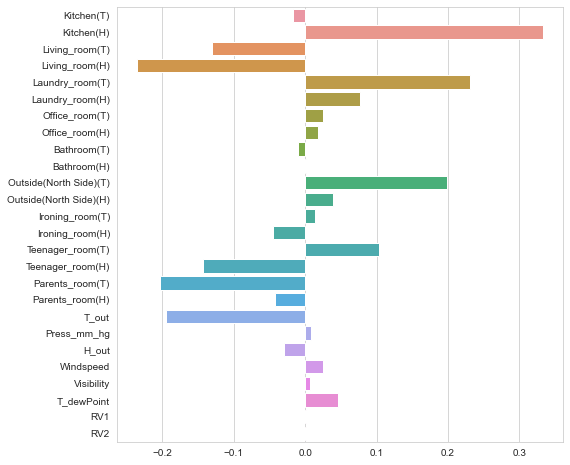

In [283]:
plt.figure(figsize=(8,8))
sns.barplot(ridge.coef_.flatten(), list(scaled_feature.columns),orient='h')
plt.yticks(rotation =0)
plt.show()

## Selecting the feature which has Highest weights.

In [284]:
# lets take only that features which has largest weights on them.
largest_weights = ['Kitchen(H)',"Laundry_room(T)", "Laundry_room(H)","Outside(North Side)(T)","Teenager_room(T)",
                  "T_dewPoint"]
feature_weights = scaled_feature[largest_weights]

In [287]:
feature_weights.head()

,Kitchen(H),Laundry_room(T),Laundry_room(H),Outside(North Side)(T),Teenager_room(T),T_dewPoint
0,0.822529,0.263211,0.777778,0.455125,0.126692,0.549231
1,0.783140,0.263211,0.780864,0.448404,0.126692,0.544615
2,0.765988,0.263211,0.788237,0.438901,0.126692,0.540000
3,0.755814,0.263211,0.791667,0.434498,0.117021,0.535385
4,0.767442,0.263211,0.791667,0.432180,0.117021,0.530769


# Creating Linear Model on feature selected dataset.

In [289]:
# train_test_split on the features which has highest weights.
x2_train, x2_test, y2_train, y2_test = train_test_split(feature_weights, target, test_size =0.3, random_state = 42)
# Let's see Ridge Regression models perform in this using highest weights features.

ridge1 = Ridge(alpha = 0.001)
ridge1.fit(x2_train, y2_train)
y_ridge1 = ridge1.predict(x2_test)


In [290]:
metrics(y2_test, y_ridge1)

R^2 Squared: 0.06208956832710344
MSE: 9662.936336837369
MAE: 57.99169142589798


In [291]:
linear_model = LinearRegression()
linear_model.fit(x2_train, y2_train)
y_linear = linear_model.predict(x2_test)


# metrics for linear Regression on highest weights.
metrics(y2_test, y_linear)

R^2 Squared: 0.06208954728135663
MSE: 9662.936553663736
MAE: 57.99169574327556


# Lasso Regression


In [257]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha =0.0001)
lasso.fit(x_train, y_train)
y_lasso = lasso.predict(x_test)

In [258]:
metrics(y_test, y_lasso)

R^2 Squared: 0.137561071960008
MSE: 0.007760836743929424
MAE: 0.05030206004961178


In [292]:
lasso.coef_

array([-0.03148657,  0.27682567, -0.02754729, -0.14349786,  0.1835748 ,
        0.03645219, -0.        , -0.        , -0.01911471,  0.        ,
        0.02980332,  0.01543652, -0.        , -0.04397521,  0.06171685,
       -0.13334914, -0.15968872, -0.02777716, -0.0028105 , -0.        ,
       -0.        ,  0.02053889,  0.00535537, -0.        ,  0.        ,
        0.        ])

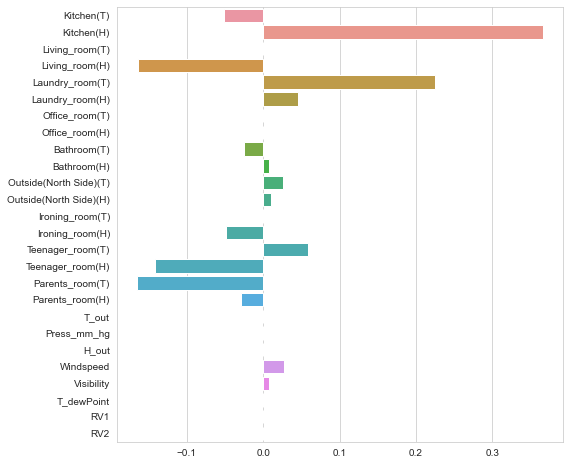

In [365]:
plt.figure(figsize=(8,8))
sns.barplot(lasso.coef_.flatten(), list(scaled_feature.columns),orient='h')
plt.yticks(rotation =0)
plt.show()

# removing the outliers doesnt effect any change in the performance.

# From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

In [312]:
from sklearn.linear_model import LinearRegression

In [313]:
x=np.array(energy_data['Living_room(T)'])
y=np.array(energy_data['Outside(North Side)(T)'])

In [314]:
x= x.reshape(-1,1)
y =y.reshape(-1,1)

In [325]:
#train_test_split
from sklearn.model_selection import train_test_split
x4_train,x4_test,y4_train,y4_test = train_test_split(x, y, test_size=0.3,random_state=42)


model = LinearRegression()

#fit the model
model.fit(x4_train, y4_train)
y4_pred = model.predict(x4_test)

In [326]:
from sklearn.metrics import r2_score

In [327]:
score = round(r2_score(y4_test, y4_pred),2)

In [328]:
score

0.64

# Working on the whole Dataset.

In [331]:
columns = energy_data[["Kitchen(T)","Kitchen(H)",
                      "Living_room(T)", "Living_room(H)","Laundry_room(T)", "Laundry_room(H)",
                      "Office_room(T)", "Office_room(H)", "Bathroom(T)","Bathroom(H)", 
                      "Outside(North Side)(T)","Outside(North Side)(H)","Ironing_room(T)",
                      "Ironing_room(H)","Teenager_room(T)","Teenager_room(H)","Parents_room(T)",
                      "Parents_room(H)","T_out","Press_mm_hg","H_out","Windspeed","Visibility",
                      "T_dewPoint","RV1", "RV2"]]
appliances = energy_data['Appliances']


In [342]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
feature_scaled = scalar.fit_transform(columns)
target = scalar.fit_transform(np.array(appliances).reshape(-1,1))

In [343]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(feature_scaled,target, test_size =0.3 , random_state =42)

In [344]:
from sklearn.linear_model import LinearRegression

In [345]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# What is the Mean Absolute Error (in two decimal places)?

In [346]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(y_test, y_pred)

In [347]:
round(mae,2)

0.05

# What is the Residual Sum of Squares (in two decimal places)?

In [348]:
from sklearn.metrics import mean_squared_error

rss = sum((y_test-y_pred)**2)

In [349]:
rss

array([45.34762967])

In [350]:
round(rss[0],2)

45.35

# What is the Root Mean Squared Error (in three decimal places)?

In [104]:
rmse = mean_squared_error(y_test, y_pred)**0.5

In [105]:
round(rmse,3)

0.088

# What is the Coefficient of Determination (in two decimal places)? 

In [351]:
r2_score(y_test, y_pred)

0.14890246319303535

#  Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [106]:
coeff = model.coef_

In [108]:
model.coef_

array([-0.00328105,  0.5535466 , -0.23617792, -0.45669795,  0.29062714,
        0.09604827,  0.028981  ,  0.02638578, -0.01565684,  0.01600579,
        0.23642491,  0.03804865,  0.01031878, -0.04461364,  0.10199505,
       -0.15759548, -0.18994077, -0.03980032, -0.32185967,  0.00683933,
       -0.07767065,  0.02918313,  0.01230661,  0.11775773,  0.0007701 ,
        0.0007701 ])

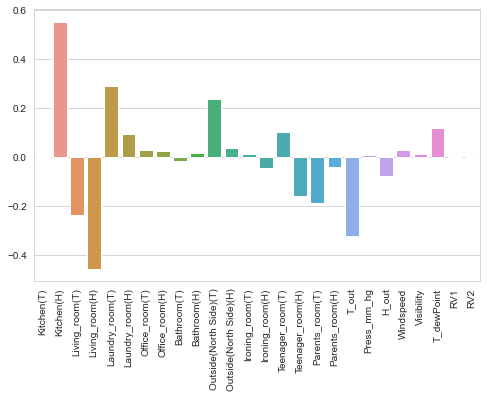

In [356]:
sns.barplot(list(scaled_feature.columns),model.coef_.flatten())
plt.xticks(rotation =90)
plt.show()


### from this graph i able to understand that the lowest is Living_room(H) i.e RH_2 and Highest is the Kitchen(H) i.e RH_1.

# Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [109]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha =0.4)

In [110]:
model_ridge.fit(x_train, y_train)

Ridge(alpha=0.4)

In [111]:
y_ridge = model_ridge.predict(x_test)

In [112]:
rmse = mean_squared_error(y_test , y_ridge)**0.5

In [113]:
rmse

0.08753385704628003

#### It is almost same so the answer is no.

# Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [357]:
from sklearn.linear_model import Lasso

model_lasso= Lasso(alpha =0.001)

In [358]:
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [359]:
y_lasso = model_lasso.predict(x_test)

In [360]:
model_lasso.coef_

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

#### There are only 4 features with non zero weights.

# What is the new RMSE with the Lasso Regression (in 3 decimal places)? 

In [361]:
rmse =mean_squared_error(y_test , y_lasso)**0.5

In [362]:
rmse

0.09358170467245137

In [363]:
round(rmse, 3)

0.094